In [1]:
from src.logic.pipelines.gaze_sam_pipeline import get_viewed_masks
from ultralytics import FastSAM
from pathlib import Path
from src.core.utils import cv2_video_resolution, cv2_video_fps, cv2_video_frame_count
from src.logic.glasses.gaze import parse_gazedata_file
import cv2

In [2]:
NUM_MODELS = 3
model = FastSAM("../checkpoints/FastSAM-x.engine")
model2 = FastSAM("../checkkpoints/FastSAM-x.pt")
CROP_SIZE = 512
VIDEO_PATH = Path("../data/recordings/af47ccce-c344-49d9-9916-5729e2ddc021.mp4")
GAZE_DATA_PATH = Path("../data/recordings/af47ccce-c344-49d9-9916-5729e2ddc021.tsv")

In [3]:
FOVEA_FOV = 2
FOV_X = 95
resolution = cv2_video_resolution(VIDEO_PATH)
viewed_radius = int((FOVEA_FOV) / FOV_X * resolution[1])

results_per_frame = get_viewed_masks(
    video_path=VIDEO_PATH,  
    model=model, 
    crop_size=CROP_SIZE,
    resolution=cv2_video_resolution(VIDEO_PATH), 
    frame_count=cv2_video_frame_count(VIDEO_PATH), 
    fps=cv2_video_fps(VIDEO_PATH),
    gaze_data=parse_gazedata_file(GAZE_DATA_PATH),
    conf=0.7,
    iou=0.9,
    viewed_radius=viewed_radius,
    save_video=True
)

Loading ../checkpoints/FastSAM-x.engine for TensorRT inference...
[01/29/2025-16:41:21] [TRT] [I] Loaded engine size: 143 MiB
[01/29/2025-16:41:21] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +1, GPU +41, now: CPU 1, GPU 178 (MiB)


In [ ]:
import matplotlib.pyplot as plt
import json

REFERENCE_IMAGES_PATH = Path("./reference_images")

with open(REFERENCE_IMAGES_PATH / "annotations.json", "r") as f:
    annotations = json.load(f)

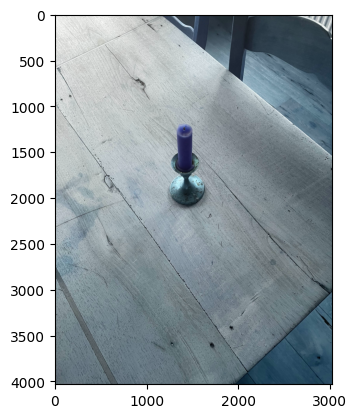

In [18]:
for annotation in annotations:
    filename = annotation["filename"]
    points = annotation["points"]
    label = annotation["label"]

    img = cv2.imread(filename)
    result = model(
        
    )